# Data analysis of Global Warming


### Overview

In this project we are going to analyze the Earth Surface Temperature Data, that can be found on [kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data). This data is for the purpose of climate change, and we are going to use it to answer some questions regarding the same topic.

### CRISP-DM

CRISP-DM (Cross-industry standard process for data mining) is an open standard process model and has six phases that describes common approaches used for data mining.

•	**Business understanding** (*What does the business need?*)<br>
•	**Data understanding** (*What data do we have / need? Is it clean?*)<br>
•	**Data preparation** (*How do we organize the data for modeling?*) <br>
•	**Modeling** (*What modeling techniques should we apply?*) <br>
•	**Evaluation** (*Which model best meets the business objectives?*) <br>
•	**Deployment** (*How do stakeholders access the results?*)<br>


<br>
<br>

For our project:<br>
Data understanding: *This dataset from kaggle has many files, but for our  purpose are used only two of them: GlobalTemperatures.csv (Global Land and Ocean-and-Land Temperatures) and GlobalLandTemperaturesByCountry.csv (Global Average Land Temperature by Country).*<br>
Data preparation: *Dealing with missing values and grouping the values by year.*<br>
Modeling: *We do not use Machine Learning models as we do not need it for answering our questions.*<br>
Evaluation the results: *You can find the results and the discussion in: [Medium post](https://melanija-gerasimovska378.medium.com/should-we-really-worry-about-climate-change-6e78efdfd639).*<br>


<br>
<br>

**Questions:**<br>
1. Did the average temperature of the land increased over years?<br>
2. Which country has the highest average temperature, and which country has the lowest?<br>
3. Is there Global Warming?<br>

### Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import time
import warnings
warnings.filterwarnings('ignore')

In [115]:
# Read the Global Land and Ocean-and-Land Temperatures data
data = pd.read_csv("input/GlobalTemperatures.csv")

In [116]:
data.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
data[data['LandAverageTemperature'].isna()]

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
10,1750-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1751-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1751-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1751-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1751-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1751-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1752-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1752-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1752-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1752-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#We will create a copy of this data
data_cp = data.copy()

In [119]:
data.info() #We want to see the type of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


###  Data preprocessing

Let's handle the missing and categorical values.

In [120]:
# Missing values
data.isna().sum() 

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

#### How to handle the missing values?

One option for handling missing data is to remove the rows with the missing values.<br>
Second option is to impute the mean of a column.<br>
Third option is to build models that work around them, and only use the information provided.<br>

Here we are going to remove the rows with missing values because that won't affect our analysis.

In [121]:
#Before we do this, we will extract only LandAverageTemperature, because has only 12 missing values, all the other columns has more.
data.LandAverageTemperature.isna().sum() #only 12 missing values
data222 = data[['dt', 'LandAverageTemperature']] 
data222.dropna(axis = 0, inplace = True) #if we drop the missing values, we won't lose important information anyway, because the missing values are for 1971,1972 and 1973, but we still have values for other months and years

In [122]:
data222['Date'] = pd.to_datetime(data222.dt)
data222['year'] = data222['Date'].dt.year
data222.drop(['dt', 'Date'], axis = 1)
data_from_1750 = data222.groupby(by = 'year').mean().reset_index() #group by year

In [123]:
data_from_1750 #This is only for LandAverageTemperature

,year,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [124]:
data.dropna(axis = 0, inplace = True) #We continue with the data that contains all columns

In [125]:
data.isna().sum() #We removed the missing values

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [126]:
data.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

#### We removed the missing values and we saw that there are no categorical variables.

#### Column: dt

This column contains the date. We are going to change this column and extract the year, month and the day from it, so that we can group our data by 'year'.

In [127]:
date_col = pd.to_datetime(data.dt)
data['Date'] = pd.to_datetime(data.dt) #We will change it here too

In [128]:
date_col.head() 

1200   1850-01-01
1201   1850-02-01
1202   1850-03-01
1203   1850-04-01
1204   1850-05-01
Name: dt, dtype: datetime64[ns]

In [129]:
data_cp.drop(columns = ['dt'], axis = 1, inplace = True) #We don't need the column dt anymore

In [130]:
data_cp.dropna(axis = 0, inplace = True) #We make sure that in data_cp we do not have row with NAN values.

In [131]:
data_cp['day'] = date_col.dt.day
data_cp['week'] = date_col.dt.week
data_cp['month'] = date_col.dt.month
data_cp['year'] = date_col.dt.year

#### Let's see how the data is distributed

In [132]:
data_cp['year']

1200    1850
1201    1850
1202    1850
1203    1850
1204    1850
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: year, Length: 1992, dtype: int64

In [133]:
data_cp['day'].value_counts()

1    1992
Name: day, dtype: int64

In [134]:
data_cp['week'].value_counts()

5     166
9     160
44    160
31    149
22    136
18    125
48    112
35    112
40    102
1      96
26     88
13     88
14     78
27     78
39     64
36     54
49     54
52     41
17     41
23     30
53     29
30     17
10      6
45      6
Name: week, dtype: int64

In [135]:
data_cp['month'].value_counts()

12    166
11    166
10    166
9     166
8     166
7     166
6     166
5     166
4     166
3     166
2     166
1     166
Name: month, dtype: int64

In [136]:
data_cp['year'].value_counts()

2015    12
1911    12
1909    12
1908    12
1907    12
        ..
1959    12
1958    12
1957    12
1956    12
1850    12
Name: year, Length: 166, dtype: int64

As we can see, week data is not evenly distributed.

We saw that there are a lot of missing values and the data is not consistent, so for the next step, we choose to work with average yearly data.

In [137]:
data_cp #We will work with the copy

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,day,week,month,year
1200,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1,1,1,1850
1201,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1,5,2,1850
1202,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1,9,3,1850
1203,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1,14,4,1850
1204,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1,18,5,1850
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,1,31,8,2015
3188,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,1,36,9,2015
3189,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,1,40,10,2015
3190,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,1,44,11,2015


In [138]:
#We do not need day,week,month anymore
data_cp = data_cp.drop(['day', 'week', 'month'], axis = 1) 

In [139]:
yearly_data = data_cp.groupby(by = 'year').mean() #This is where we group our data by 'year' and as we said, we will work with the mean.

In [140]:
yearly_data

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
year,,,,,,,,
1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417
...,...,...,...,...,...,...,...,...
2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000
2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500
2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667


In [141]:
yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 1850 to 2015
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     166 non-null    float64
 1   LandAverageTemperatureUncertainty          166 non-null    float64
 2   LandMaxTemperature                         166 non-null    float64
 3   LandMaxTemperatureUncertainty              166 non-null    float64
 4   LandMinTemperature                         166 non-null    float64
 5   LandMinTemperatureUncertainty              166 non-null    float64
 6   LandAndOceanAverageTemperature             166 non-null    float64
 7   LandAndOceanAverageTemperatureUncertainty  166 non-null    float64
dtypes: float64(8)
memory usage: 11.7 KB


In [142]:
yearly_data.describe(include='all')  

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,0.473687,0.208560,0.447741,0.549759,0.614124,0.406697,0.298629,0.071441
min,7.558583,0.062083,13.081000,0.078500,1.525083,0.102500,14.740083,0.047500
25%,8.195708,0.094333,14.055917,0.139542,2.262563,0.149896,14.991208,0.062937
50%,8.540750,0.240625,14.307708,0.240125,2.734917,0.274667,15.144208,0.123625
75%,8.791250,0.341958,14.539167,0.508000,3.126833,0.437000,15.379104,0.150229
max,9.831000,0.918250,15.572667,2.619250,4.148833,1.778500,16.058583,0.316417


#### Plot

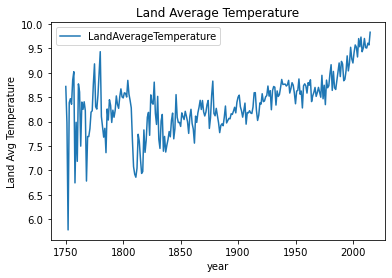

In [143]:
#First we will plot LandAverageTemperature for data from 1750, and then for data from 1850
data_from_1750.plot(x = 'year', y = 'LandAverageTemperature', label='LandAverageTemperature')
plt.title('Land Average Temperature')
plt.ylabel('Land Avg Temperature')
plt.xlabel('year')
plt.legend()
plt.show()

In [144]:
#Plot for LandAverageTemperature from year 1850
data2 = data_cp.groupby(by = 'year').mean().reset_index()
xlabel = data2['LandAverageTemperature']
ylabel = data2['year']

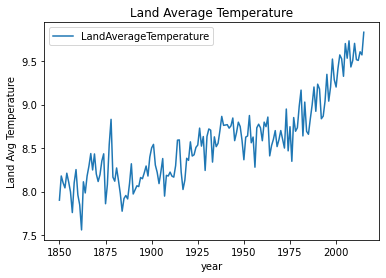

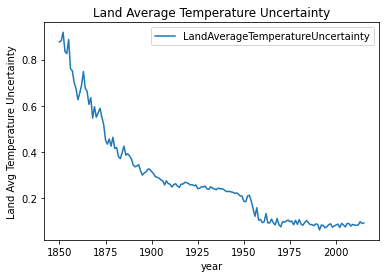

In [145]:
data2.plot(x = 'year', y = 'LandAverageTemperature', label='LandAverageTemperature')
plt.title('Land Average Temperature')
plt.ylabel('Land Avg Temperature')
plt.xlabel('year')
data2.plot(x = 'year', y = 'LandAverageTemperatureUncertainty', label='LandAverageTemperatureUncertainty')
plt.title('Land Average Temperature Uncertainty')
plt.ylabel('Land Avg Temperature Uncertainty')
plt.xlabel('year')
plt.legend()
plt.show()

#### ***Question 1:*** Did the average temperature of the land increased over years?
#### ***Answer:*** From this plot here, we can confirm that the average temperature of the land has increased over the years.

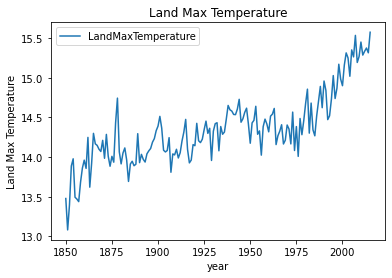

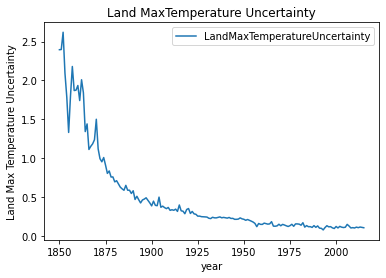

In [146]:
#LandMaxTemperature
data2 = data_cp.groupby(by = 'year').mean().reset_index()
xlabel = data2['LandMaxTemperature']
ylabel = data2['year']
data2.plot(x = 'year', y = 'LandMaxTemperature', label='LandMaxTemperature')
plt.title('Land Max Temperature')
plt.ylabel('Land Max Temperature')
plt.xlabel('year')
data2.plot(x = 'year', y = 'LandMaxTemperatureUncertainty', label='LandMaxTemperatureUncertainty')
plt.title('Land MaxTemperature Uncertainty')
plt.ylabel('Land Max Temperature Uncertainty')
plt.xlabel('year')
plt.legend()
plt.show()

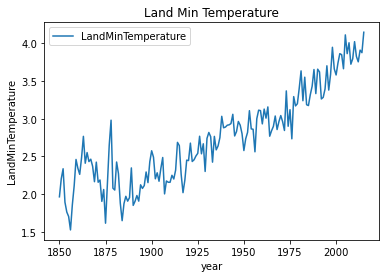

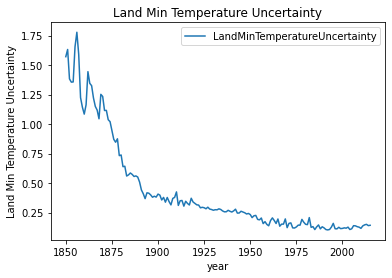

In [147]:
#LandMinTemperature
data2 = data_cp.groupby(by = 'year').mean().reset_index()
#xlabel = data2['LandMinTemperature']
#ylabel = data2['year']
data2.plot(x = 'year', y = 'LandMinTemperature', label='LandMinTemperature')
plt.title('Land Min Temperature')
plt.ylabel('LandMinTemperature')
plt.xlabel('year')
data2.plot(x = 'year', y = 'LandMinTemperatureUncertainty', label='LandMinTemperatureUncertainty')
plt.title('Land Min Temperature Uncertainty')
plt.ylabel('Land Min Temperature Uncertainty')
plt.xlabel('year')
plt.legend()
plt.show()

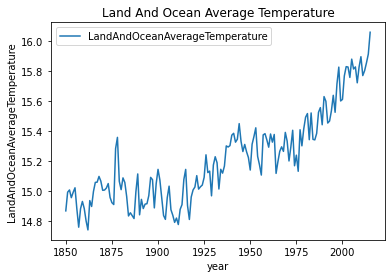

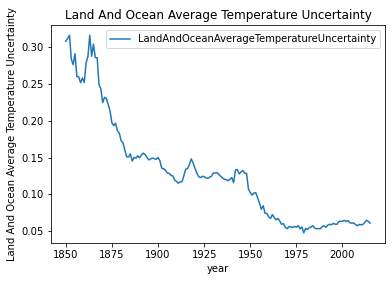

In [148]:
#LandAndOceanAverageTemperature	
data2 = data_cp.groupby(by = 'year').mean().reset_index()
#xlabel = data2['LandAndOceanAverageTemperature']
#ylabel = data2['year']
data2.plot(x = 'year', y = 'LandAndOceanAverageTemperature', label='LandAndOceanAverageTemperature')
plt.title('Land And Ocean Average Temperature')
plt.ylabel('LandAndOceanAverageTemperature')
plt.xlabel('year')
data2.plot(x = 'year', y = 'LandAndOceanAverageTemperatureUncertainty', label='LandAndOceanAverageTemperatureUncertainty')
plt.title('Land And Ocean Average Temperature Uncertainty')
plt.ylabel('Land And Ocean Average Temperature Uncertainty')
plt.xlabel('year')
plt.legend()
plt.show()

#### From all the plots above, we come to a conclusion that the Global Warming is really happening! But, we will explore more data so that we can see more proofs for it.

From LandAverageTemperature, we can see that starting from year 1975, we have a constantly rising temperature, so this year will be our main point for discussion.

We are going to compare the temperatures before and after year 1975. 

In [174]:
first_temp = float(data_from_1750.loc[data_from_1750['year'] == 1750]['LandAverageTemperature'])
second_temp = float(data_from_1750.loc[data_from_1750['year'] == 1975]['LandAverageTemperature'])
third_temp = float(data_from_1750.loc[data_from_1750['year'] == 2015]['LandAverageTemperature'])
ff = float(second_temp) - float(first_temp)
ff2 = float(third_temp) - float(second_temp)
print(f'The average temperature for year 1750 is {first_temp} and for year 1975 is {second_temp}. The temperature increased by {ff}.')
print(f'The average temperature for year 1975 is {second_temp} and for year 2015 is {third_temp}. The temperature increased by {ff2}.')

The average temperature for year 1750 is 8.719363636363637 and for year 1975 is 8.744833333333334. The temperature increased by 0.025469696969697253.
The average temperature for year 1975 is 8.744833333333334 and for year 2015 is 9.830999999999998. The temperature increased by 1.0861666666666636.


In [150]:
first_temp = float(data2.loc[data2['year'] == 1850]['LandAverageTemperature'])
second_temp = float(data2.loc[data2['year'] == 1975]['LandAverageTemperature'])
third_temp = float(data2.loc[data2['year'] == 2015]['LandAverageTemperature'])
ff = float(second_temp) - float(first_temp)
ff2 = float(third_temp) - float(second_temp)

In [175]:
print(f'The average temperature for year 1850 is {first_temp} and for year 1975 is {second_temp}. The temperature increased by {ff}.')
print(f'The average temperature for year 1975 is {second_temp} and for year 2015 is {third_temp}. The temperature increased by {ff2}.')

The average temperature for year 1850 is 8.719363636363637 and for year 1975 is 8.744833333333334. The temperature increased by 0.025469696969697253.
The average temperature for year 1975 is 8.744833333333334 and for year 2015 is 9.830999999999998. The temperature increased by 1.0861666666666636.


In [176]:
#Let's see for the other columns
first_temp = float(data2.loc[data2['year'] == 1850]['LandMaxTemperature'])
second_temp = float(data2.loc[data2['year'] == 1975]['LandMaxTemperature'])
third_temp = float(data2.loc[data2['year'] == 2015]['LandMaxTemperature'])
ff = float(second_temp) - float(first_temp)
ff2 = float(third_temp) - float(second_temp)
print(f'The max temperature for year 1850 is {first_temp} and for year 1975 is {second_temp}. The max temperature increased by {ff}.')
print(f'The  max temperature for year 1975 is {second_temp} and for year 2015 is {third_temp}. The max temperature increased by {ff2}.')

The max temperature for year 1850 is 13.476666666666667 and for year 1975 is 14.383666666666665. The max temperature increased by 0.9069999999999983.
The  max temperature for year 1975 is 14.383666666666665 and for year 2015 is 15.572666666666665. The max temperature increased by 1.189.


In [177]:
#Let's see for the other columns
first_temp = float(data2.loc[data2['year'] == 1850]['LandMinTemperature'])
second_temp = float(data2.loc[data2['year'] == 1975]['LandMinTemperature'])
third_temp = float(data2.loc[data2['year'] == 2015]['LandMinTemperature'])
ff = float(second_temp) - float(first_temp)
ff2 = float(third_temp) - float(second_temp)
print(f'The min temperature for year 1850 is {first_temp} and for year 1975 is {second_temp}. The min temperature increased by {ff}.')
print(f'The min temperature for year 1975 is {second_temp} and for year 2015 is {third_temp}. The min temperature increased by {ff2}.')

The min temperature for year 1850 is 1.964333333333333 and for year 1975 is 3.121083333333333. The min temperature increased by 1.15675.
The min temperature for year 1975 is 3.121083333333333 and for year 2015 is 4.148833333333333. The min temperature increased by 1.0277500000000002.


All of the above mentioned temperatures have increased over the last 30 years, especially the min temperature.

### Now, let's explore the temperature data for a specific land.

In [154]:
global_temp_country = pd.read_csv('input/GlobalLandTemperaturesByCountry.csv')

In [155]:
global_temp_country.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [156]:
#data shape
global_temp_country.shape[0]

577462

In [157]:
global_temp_country['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

#### As we can see, there are name of continents, names like Denmark, Denmark (Europe) and we should solve that problem.

In [158]:
global_temp_country[ global_temp_country['Country'] == 'Denmark (Europe)']

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
139254,1743-11-01,6.507,1.767,Denmark (Europe)
139255,1743-12-01,NaN,NaN,Denmark (Europe)
139256,1744-01-01,NaN,NaN,Denmark (Europe)
139257,1744-02-01,NaN,NaN,Denmark (Europe)
139258,1744-03-01,NaN,NaN,Denmark (Europe)
...,...,...,...,...
142488,2013-05-01,12.208,0.514,Denmark (Europe)
142489,2013-06-01,14.893,0.341,Denmark (Europe)
142490,2013-07-01,17.986,0.373,Denmark (Europe)
142491,2013-08-01,17.528,0.342,Denmark (Europe)


In [159]:
global_temp_country[ global_temp_country['Country'] == 'Denmark'] #Just want to see the values of the columns for Denmark and Denmark (Europe)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
142493,1823-01-01,-29.446,3.646,Denmark
142494,1823-02-01,-31.746,3.438,Denmark
142495,1823-03-01,-28.439,2.757,Denmark
142496,1823-04-01,-21.488,3.379,Denmark
142497,1823-05-01,-12.925,2.935,Denmark
...,...,...,...,...
144777,2013-05-01,-12.048,0.929,Denmark
144778,2013-06-01,-3.101,1.129,Denmark
144779,2013-07-01,-0.900,1.023,Denmark
144780,2013-08-01,-3.782,0.835,Denmark


In [160]:
#Rows we should delete are: Europe, Africa, Asia, South America, Denmark, France, Netherlands, United Kingdom, Antarctica

In [161]:
global_temp_country.drop(global_temp_country.loc[global_temp_country['Country']=='Europe'].index, inplace=True)

In [162]:
global_temp_country = global_temp_country[~global_temp_country['Country'].isin(['Africa', 'Antarctica', 'South America', 'Asia', 'Netherlands',
     'United Kingdom', 'Denmark', 'France'])]

In [163]:
global_temp_country.shape[0]

555165

In [165]:
len(global_temp_country['Country'].unique()) #We have 234 countries

234

In [166]:
tem = global_temp_country
tem['Date'] = pd.to_datetime(global_temp_country.dt)
tem['Date'].dt.year.unique()

array([1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753,
       1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764,
       1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775,
       1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786,
       1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
       1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830,
       1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
       1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
       1886, 1887, 1888, 1889, 1890, 1891, 1892, 18

In [167]:
#Because we deleted the values we do not need, now we have to change the names. For example: France(Europe) should be just France
global_temp_country = global_temp_country.replace(['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [168]:
#Now let's take a look at the average temperature for every country we have
countries = np.unique(global_temp_country['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == 
                                               country]['AverageTemperature'].mean())

In [169]:
#Plotting a world map
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

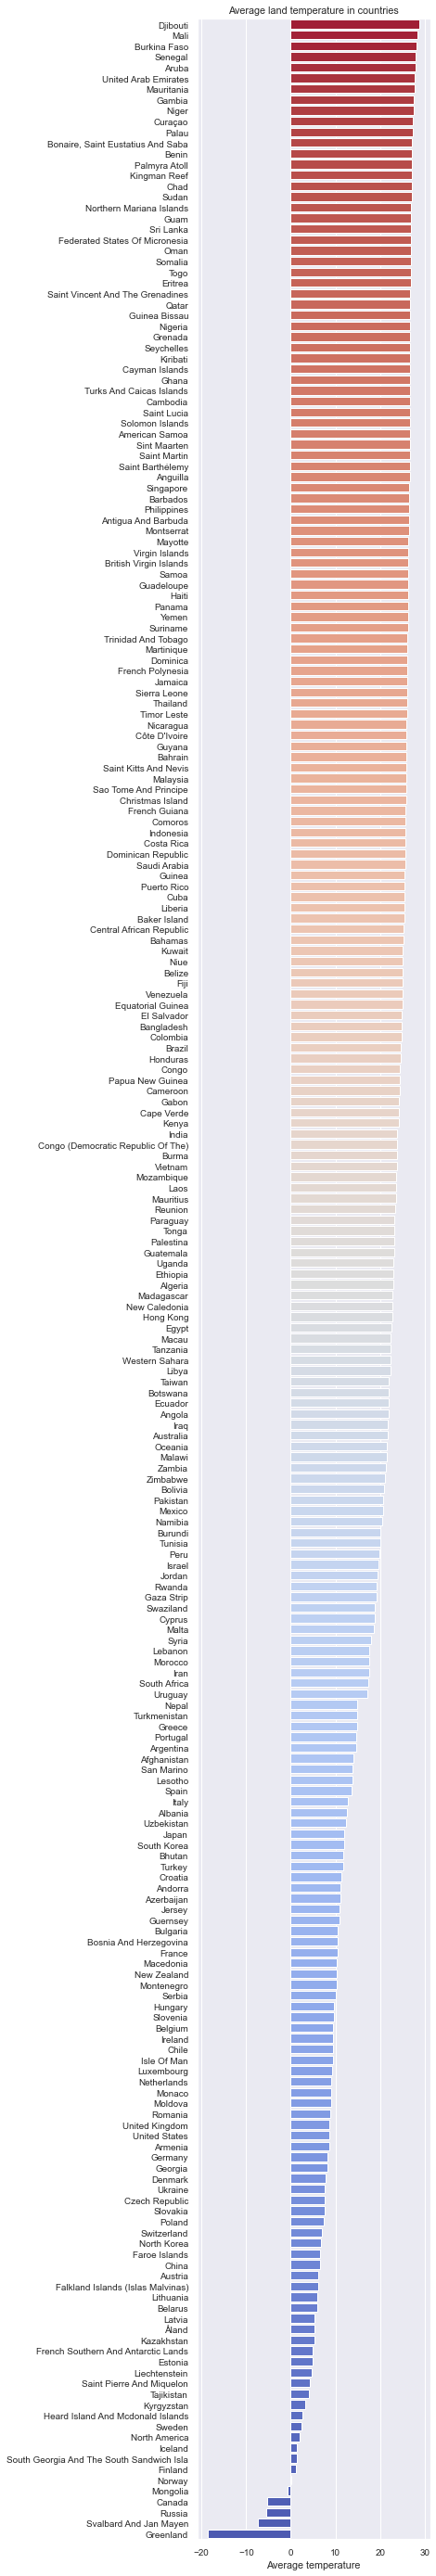

In [170]:
# Now let's see visually who has the highest average temperature
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

#### ***Question 2:*** Which country has the highest average temperature, and which country has the lowest?
#### ***Answer:*** Djibouti is the country with the highest average temperature, and Greenland is the country with the lowest average temperature.

In [171]:
#Let's see for the hottest and the coldest country how the temperature changed grouped by year
#Hottest: Djibouti
#Coldest: Greenland

global_temp_country['Date'] = pd.to_datetime(global_temp_country.dt)

#Hottest country
hottest_country = global_temp_country[ global_temp_country['Country'] == 'Djibouti']
hottest_country['year'] = global_temp_country['Date'].dt.year
hottest_country.drop(['Date', 'dt'], axis=1, inplace=True)

#Coldest country
coldest_country = global_temp_country[ global_temp_country['Country'] == 'Greenland']
coldest_country['year'] = global_temp_country['Date'].dt.year
coldest_country.drop(['Date', 'dt'], axis=1, inplace=True)

hottest_country2 = hottest_country.groupby(by = 'year').mean().reset_index()
coldest_country2 = coldest_country.groupby(by = 'year').mean().reset_index()

print(hottest_country2)

     year  AverageTemperature  AverageTemperatureUncertainty
0    1864           28.244833                       1.104083
1    1865                 NaN                            NaN
2    1866                 NaN                            NaN
3    1867                 NaN                            NaN
4    1868                 NaN                            NaN
..    ...                 ...                            ...
145  2009           29.896750                       0.629917
146  2010           29.837000                       0.648000
147  2011           29.844333                       0.649417
148  2012           29.923583                       0.787750
149  2013           30.744750                       1.139875

[150 rows x 3 columns]


In [172]:
#We will drop the rows with NAN or we can fill them with mean. Here we choose to drop them.
hottest_country2.dropna(inplace = True)
coldest_country2.dropna(inplace = True)
print(hottest_country2)

     year  AverageTemperature  AverageTemperatureUncertainty
0    1864           28.244833                       1.104083
11   1875           29.111625                       0.986375
12   1876           28.123833                       1.014500
13   1877           28.744333                       1.145333
14   1878           28.938417                       1.118083
..    ...                 ...                            ...
145  2009           29.896750                       0.629917
146  2010           29.837000                       0.648000
147  2011           29.844333                       0.649417
148  2012           29.923583                       0.787750
149  2013           30.744750                       1.139875

[139 rows x 3 columns]


#### Plot

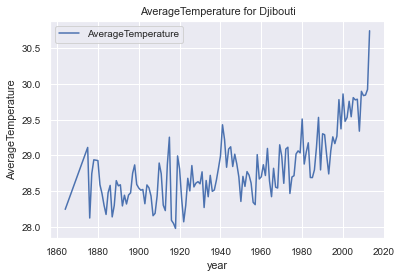

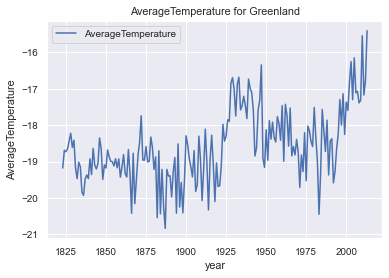

In [173]:
hottest_country2.plot(x = 'year', y = 'AverageTemperature', label='AverageTemperature')
plt.title('AverageTemperature for Djibouti')
plt.ylabel('AverageTemperature')
plt.xlabel('year')
coldest_country2.plot(x = 'year', y = 'AverageTemperature', label='AverageTemperature')
plt.title('AverageTemperature for Greenland')
plt.ylabel('AverageTemperature')
plt.xlabel('year')
plt.legend()
plt.show()

#### ***Question 3:*** Is there Global Warming?
#### ***Answer:*** According to this graph, and the graphs before, we can confirm that there is a global warming, because the temperatures are increasing over the years and we should really worry about that.